In [1]:
import os
import pandas as pd
import numpy as np 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_test = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic_test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.groupby(by='Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#removing nan values
#axis=1 are columns
data = data[data['Age'].notna()]
data = data[data['Embarked'].notna()]

In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data['Sex'].replace({'male':0, 'female':1}, inplace= True)
data['Embarked'].replace({'C':1, 'Q':2, 'S':0}, inplace= True)
data['Embarked'].head()

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


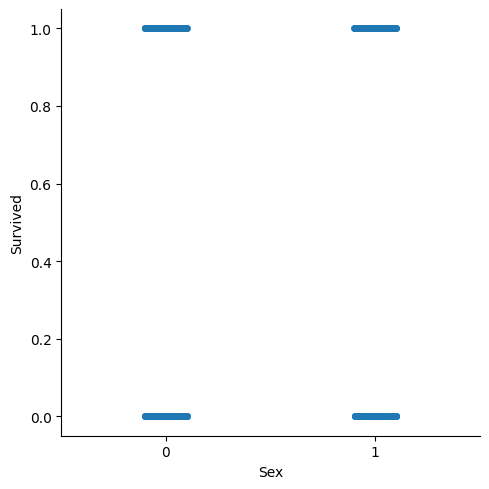

In [11]:
from sklearn import metrics
import seaborn as sns
sns.catplot(x = 'Sex', y = 'Survived', data = data)

<ipython-input-12-d2f4ef70fa21>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap = 'YlGnBu')


<Axes: >

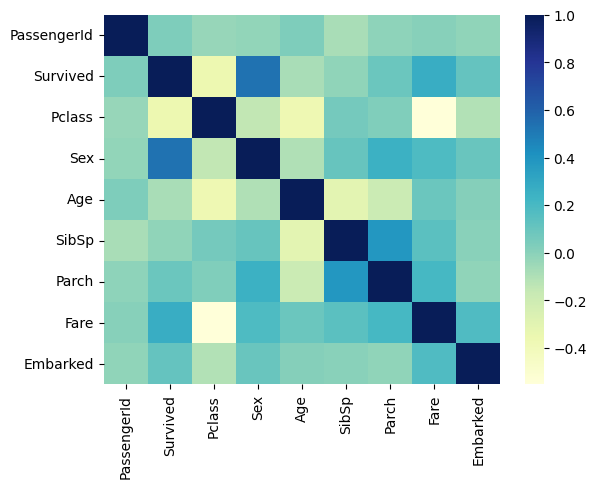

In [12]:
sns.heatmap(data.corr(),cmap = 'YlGnBu')
#turns out the lower class people could not survive as much as upper class people. Shocker!
#the more people paid for their tickets, the better their chances at surviving

**Understanding A Correlation Heat Map**


---

A negative correlation does not mean that the value is not related. It just means that the higher one value gets, the lower the other one gets. Its inversely proportional and just as important as a positive correlation. What is not important are values close to zero because they mean that the values are random and do not tell us anything about the dependent variable.


**Inferences**

---


*  The more people paid for the ticket, the better their chances at survival (Fair and Survival show positive correlation)
*   The higher the class (the lower the value of Pclass), the higher the chances of survival (negative correlation between Pclass and survival)




In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size = 0.2, random_state = 1)

In [14]:
train_df.shape

(569, 12)

In [15]:
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
X = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
y = 'Survived'

X_train = train_df[X]
y_train = train_df[y]

X_test = test_df[X]
y_test = test_df[y]

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7552447552447552


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
user_info= [{'Pclass': 1, 'Sex': 0, 'Age':64, 'SibSp': 0, 'Parch':0, 'Fare': 8000, 'Embarked': 1}]
print(pd.DataFrame(user_info))
y_user_pred = logreg_model.predict(pd.DataFrame(user_info))
print(y_user_pred)

   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0       1    0   64      0      0  8000         1
[1]


**PICKLING**

---
Pickling is a way to transfer data sets to different files.
Pickling is used because it transfers data in a serialized manner. 


1.   Dump the model into a file (that you have to create on the sidebar)
2.   Load the files in your new environment




In [25]:
import pickle

#you actually need to create a new file on the sidebar
#the open() function takes two parameters here - the model name and whether it is a write binary file or a read binary file 
pickle.dump(logreg_model, open('regmodel.pkl', 'wb'))


In [28]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))
pickled_model.predict(pd.DataFrame(user_info))

array([1])